In [34]:
import sys
sys.path.append("..")

from TicTacToe import Board
from training_environments import Reinforcement as r

from sklearn.neural_network import MLPClassifier

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [35]:
file1 = "../model_binaries/agent_relu_second.sav"
agent1 = pickle.load(open(file1,"rb"))
agent1.loss_

0.011486539592688588

In [36]:
game = Board()
v = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v = np.array([v])
agent1.predict_proba(v), agent1.predict(v)

(array([[1.57608699e-04, 7.03529074e-05, 9.98889995e-01, 1.59957284e-04,
         1.27782004e-04, 2.42019389e-04, 7.90041606e-05, 1.79142480e-04,
         9.41385464e-05]]),
 array([3]))

In [37]:
agent1.loss_

0.011486539592688588

In [38]:
# Randomly select a small subset of each match's states to train the model. Training on *every* state means that even the correct moves made will get punished. 
# If we randomly select a small subset, good moves may be punished less frequently and good moves may also be better reinforced

# look at the confidence level of different decisions and consider setting a theshold
# if the model isn't 80% confident in a decision, should we just make a random move?

f = list()
L1 = agent1.loss_
for x in range(100):
    # if x % 100 == 0:
    #     print(x / 10000)
    
    res = r.bot_vs_rand_environment(model=agent1, bot_first=False, first_tracked=False, train_model=False, training_type="sparse", print_board=False)
    f.append(res[0])
    
    L2 = agent1.loss_
    
    if L2 > 2 and L1 < 1:
        print(res[1])
        
    L1 = L2

In [39]:
agent1.loss_

0.011486539592688588

In [40]:
# bot plays first
results1 = list()
for _ in range(10000):
    res1 = r.bot_vs_rand_environment(model=agent1, bot_first=True, first_tracked=False, train_model=False, training_type="dense", print_board=False)
    results1.append(res1[0])
    
results1.count(1)

9511

In [41]:
# bot plays second
results1 = list()
for _ in range(10000):
    res1 = r.bot_vs_rand_environment(model=agent1, bot_first=False, first_tracked=False, train_model=False, training_type="dense", print_board=False)
    results1.append(res1[0])
    
results1.count(1)

8351

In [42]:
pickle.dump(agent1, open(file1, "wb"))

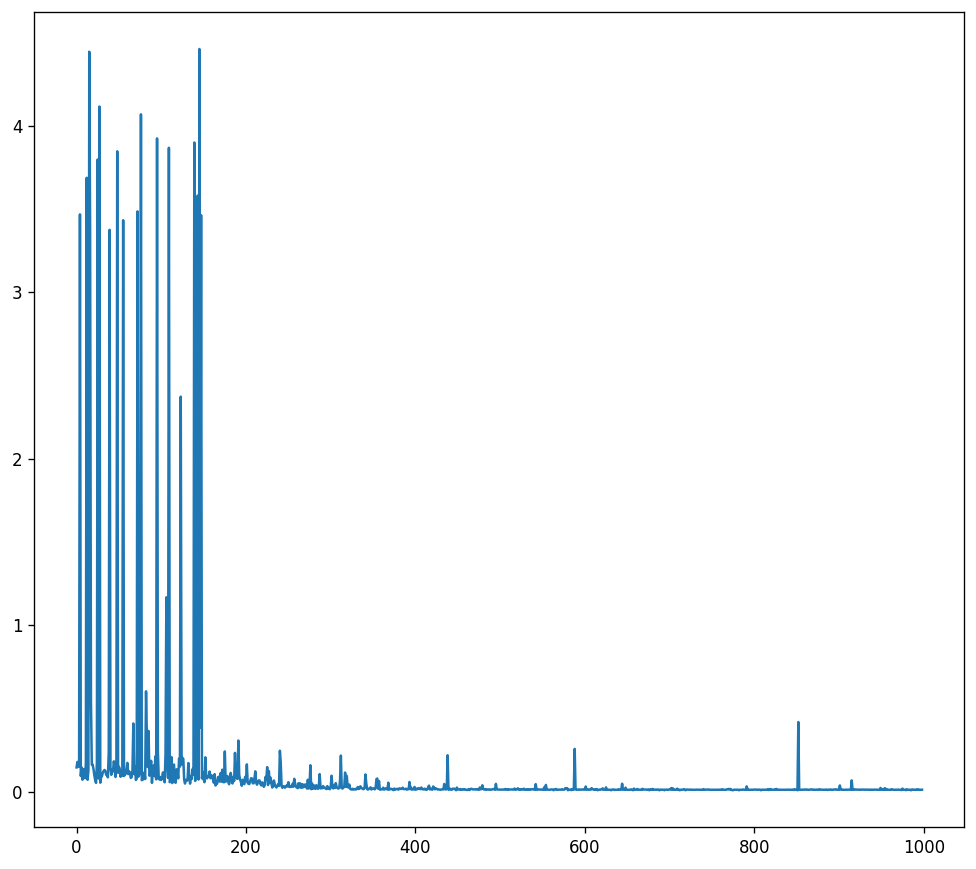

In [43]:
y_plot = agent1.loss_curve_[-1000:-1:1]
loss_ct = len(y_plot)
x_plot = range(loss_ct)

plt.figure(figsize=(10, 9), dpi=120)
plt.plot(x_plot, y_plot)
plt.show()

In [82]:
r.bot_vs_rand_environment(model=agent1, bot_first=True, first_tracked=False, train_model=False, print_board=True)

   |   | X 
-----------
   | X | O 
-----------
 X | O |   


(1,
    1  2  3  4  5  6  7  8  9  label
 0  0  0  0  0  0  0  0  0  0      3
 1  0  0  1  0  0  0  0 -1  0      5
 2  0  0  1  0  1 -1  0 -1  0      7)